<a href="https://colab.research.google.com/github/Dhee2211/ML/blob/main/image_classification_with_conv_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

#importing helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [21]:
dataset , metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_datset, test_dataset = dataset['train'], dataset['test']



In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Snearker', 'bag', 'Ankel boot']


In [22]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(f"Number of training examples: {num_train_examples}")
print(f"Number of test examples: {num_test_examples}")



Number of training examples: 60000
Number of test examples: 10000


In [32]:
#Normalize 
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()

  

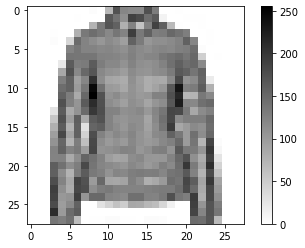

In [25]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()



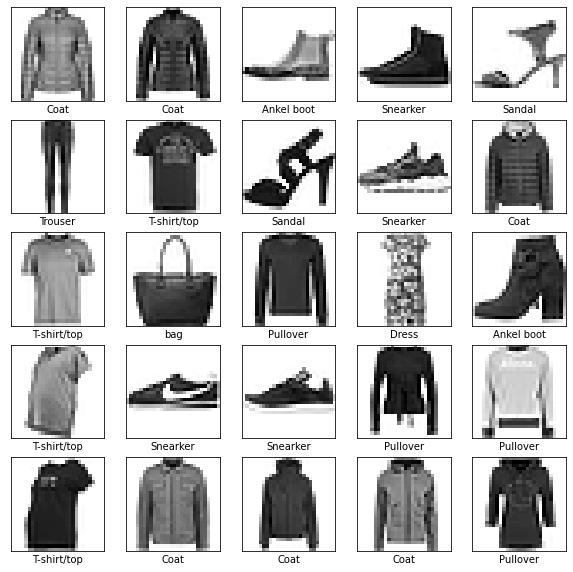

In [26]:
plt.figure(figsize=(10,10))
i = 0 
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot( 5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap= plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1 
plt.show()

In [33]:

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                                                    input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [34]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [35]:
BATCH_SIZE = 32 
train_dataset = train_datset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [36]:
model.fit(train_datset,epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10


ValueError: ignored